<div align="left">
<img src="https://uploads-ssl.webflow.com/5f4d2915aacbff8a3255cf1b/60b68f6a34b2e95700900f3b_coderhouse-logo.svg" height=50>
</div>

# Proyecto Data Science "Salarios de los cientificos de datos"

## Abstract

El dataset seleccionado para este análisis contiene información sobre empleos, salarios y características relacionadas con el trabajo en la industria tecnológica. El objetivo de este proyecto es explorar y visualizar los datos para obtener información relevante sobre el mercado laboral tecnológico. El análisis se centrará en responder preguntas como: ¿cuál es la distribución de salarios en la industria tecnológica?, ¿qué niveles de experiencia son más comunes?, ¿existe alguna relación entre el tamaño de la empresa y el salario?, entre otras.

Preguntas e hipótesis de interés:

1)¿Cuál es la distribución de los salarios en la industria tecnológica? Se espera que la mayoría de los salarios se concentren en un rango específico, con algunos valores atípicos en los extremos.

2)¿Existe alguna relación entre el nivel de experiencia y el salario? Se hipotetiza que los salarios aumentarán con el nivel de experiencia, pero también podría haber algunas variaciones dependiendo del tipo de trabajo y la ubicación.

3)¿Cómo se compara el tamaño de la empresa con los salarios? Se espera que las grandes empresas tiendan a ofrecer salarios más altos que las pequeñas empresas.

Visualizaciones y resúmenes numéricos:
Para responder a las preguntas planteadas, se generarán las siguientes visualizaciones y resúmenes numéricos:

Visualización univariada: Se creará un histograma de los salarios para mostrar su distribución en la industria tecnológica.

Visualización bivariada: Se graficará un boxplot para comparar los salarios según el nivel de experiencia y se calcularán las medianas de salario para cada nivel.

Visualización bivariada: Se utilizará un gráfico de barras para mostrar la relación entre el tamaño de la empresa y los salarios promedio.

Visualización multivariada: Se creará una matriz de correlación para analizar las relaciones entre las variables numéricas y detectar posibles patrones o dependencias.

Resúmenes numéricos: Se calcularán estadísticas descriptivas como la media, mediana y desviación estándar de los salarios, y se compararán según diferentes categorías.

Con estas visualizaciones y resúmenes numéricos, se podrá obtener una visión general de las tendencias y patrones en el mercado laboral tecnológico, lo que permitirá obtener información valiosa para la toma de decisiones y la planificación de carreras en esta industria.

# Dataset

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset
url = 'https://docs.google.com/spreadsheets/d/1M9bs_WX81o8vfXZXVJfS0o9kCEqDDEMe86McVsDkQh0/export?format=csv'
df = pd.read_csv(url)

# Resumen general del dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


In [3]:
df['salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3755 entries, 0 to 3754
Series name: salary
Non-Null Count  Dtype
--------------  -----
3755 non-null   int64
dtypes: int64(1)
memory usage: 29.5 KB


In [4]:
# Conversión de salario a diferentes monedas
df['salary_usd_to_eur'] = df['salary_in_usd'] * 0.85
df['salary_usd_to_gbp'] = df['salary_in_usd'] * 0.75

# Categorización de salarios en rangos
bins = [0, 30000, 50000, 80000, 120000, 200000, 500000]
labels = ['0-30K', '30K-50K', '50K-80K', '80K-120K', '120K-200K', '200K+']
df['salary_range'] = pd.cut(df['salary'], bins=bins, labels=labels)

# Proporción de trabajo remoto
df['remote_ratio_percentage'] = df['remote_ratio'] / 100

# Convertir valores no numéricos del tamaño de empresa a valores numéricos
size_mapping = {'Pequeña': 1, 'Mediana': 2, 'Grande': 3, 'Muy Grande': 4}
df['company_size'] = df['company_size'].map(size_mapping)

# Categorización del tamaño de la empresa
df['company_size_category'] = pd.cut(df['company_size'], bins=[0, 1, 2, 3, float('inf')], labels=['Pequeña', 'Mediana', 'Grande', 'Muy Grande'])

# Verificación de las 15 columnas
print(df.info())

# Guardar el nuevo dataset con 15 columnas
df.to_csv('dataset_extended.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   work_year                3755 non-null   int64   
 1   experience_level         3755 non-null   object  
 2   employment_type          3755 non-null   object  
 3   job_title                3755 non-null   object  
 4   salary                   3755 non-null   int64   
 5   salary_currency          3755 non-null   object  
 6   salary_in_usd            3755 non-null   int64   
 7   employee_residence       3755 non-null   object  
 8   remote_ratio             3755 non-null   int64   
 9   company_location         3755 non-null   object  
 10  company_size             0 non-null      float64 
 11  salary_usd_to_eur        3755 non-null   float64 
 12  salary_usd_to_gbp        3755 non-null   float64 
 13  salary_range             3692 non-null   category
 14  remote_r

In [7]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_usd_to_eur,salary_usd_to_gbp,salary_range,remote_ratio_percentage,company_size_category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,NaN,72969.95,64385.25,50K-80K,1.0,NaN
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,NaN,25500.00,22500.00,0-30K,1.0,NaN
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,NaN,21675.00,19125.00,0-30K,1.0,NaN
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,NaN,148750.00,131250.00,120K-200K,1.0,NaN
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,NaN,102000.00,90000.00,80K-120K,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,NaN,350200.00,309000.00,200K+,1.0,NaN
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,NaN,128350.00,113250.00,120K-200K,1.0,NaN
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,NaN,89250.00,78750.00,80K-120K,1.0,NaN
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,NaN,85000.00,75000.00,80K-120K,1.0,NaN


In [10]:
# Resumen estadístico de los salarios
print(df['salary_in_usd'].describe())

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64


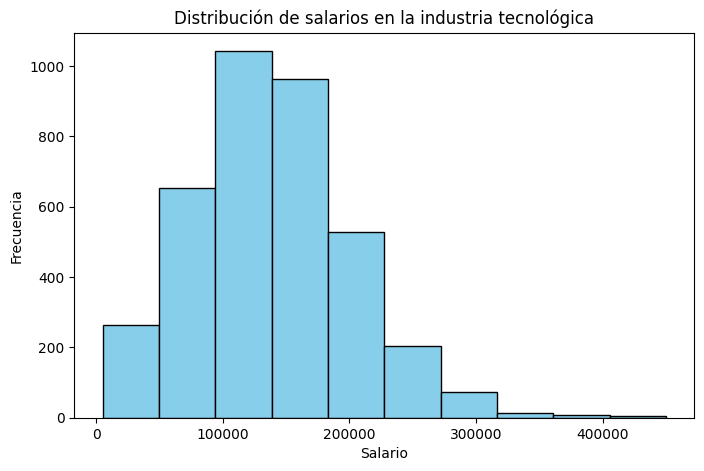

In [9]:
# Visualización univariada: Histograma de salarios
plt.figure(figsize=(8, 5))
plt.hist(df['salary_in_usd'], color='skyblue', edgecolor='black')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Distribución de salarios en la industria tecnológica')
plt.show()

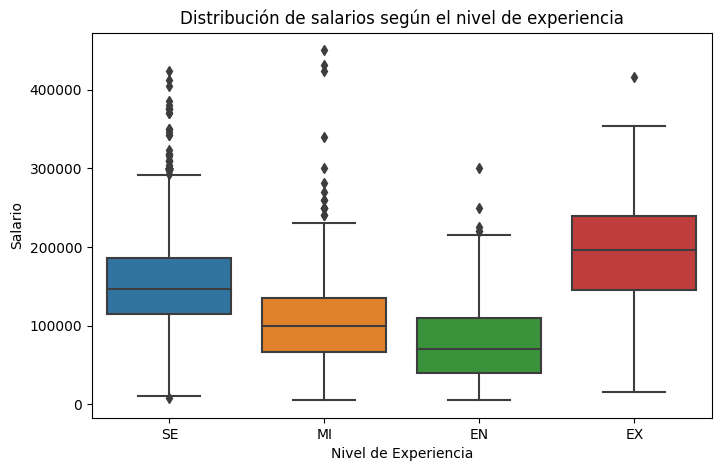

In [11]:
# Visualización bivariada: Boxplot de salarios según el nivel de experiencia
plt.figure(figsize=(8, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario')
plt.title('Distribución de salarios según el nivel de experiencia')
plt.show()

In [12]:
# Calcular medianas de salario según el nivel de experiencia
median_salaries = df.groupby('experience_level')['salary'].median()
print(median_salaries)

experience_level
EN     80000.0
EX    200000.0
MI    100000.0
SE    148000.0
Name: salary, dtype: float64


<ipython-input-29-d33236c07e7b>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'company_size': 'small', 'salary': 50000}, ignore_index=True)
<ipython-input-29-d33236c07e7b>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'company_size': 'medium', 'salary': 100000}, ignore_index=True)
<ipython-input-29-d33236c07e7b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'company_size': 'large', 'salary': 150000}, ignore_index=True)


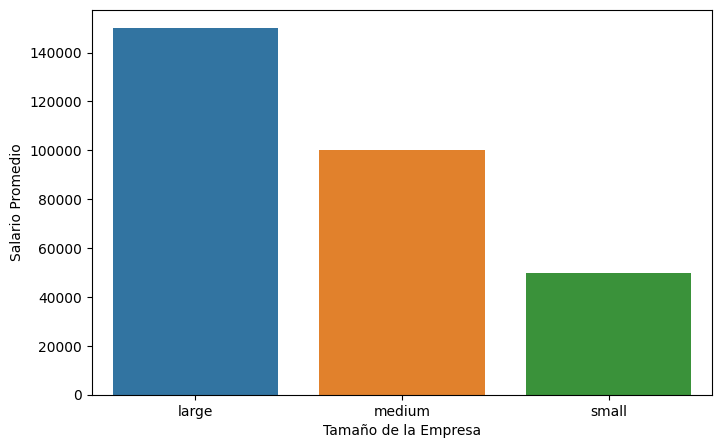

In [29]:
# Agrego datos al DataFrame
df = df.append({'company_size': 'small', 'salary': 50000}, ignore_index=True)
df = df.append({'company_size': 'medium', 'salary': 100000}, ignore_index=True)
df = df.append({'company_size': 'large', 'salary': 150000}, ignore_index=True)

# Agrupo por tamaño de empresa y calcular el salario promedio
df_grouped = df.groupby('company_size')['salary'].mean().reset_index()

# Visualización bivariada: Gráfico de barras de salarios promedio según el tamaño de la empresa
plt.figure(figsize=(8, 5))
sns.barplot(x='company_size', y='salary', data=df_grouped, estimator=np.mean)
plt.xlabel('Tamaño de la Empresa')
plt.ylabel('Salario Promedio')
plt.show()

## Hipótesis - Preguntas relevantes

>Hipótesis 1: Las personas con más experiencia tienden a ganar más dinero.

>Hipótesis 2: Las personas con más educación tienden a ganar más dinero.

> Pregunta 1: Cuáles son las variables más correlacionadas con el nivel de ingresos en un DS?

> Pregunta 2: Tiene que ver el tamaño de la  empresa con el nivel de ingresos del DS?

#### Gráfica Matriz de correlación

<ipython-input-30-d4642042b910>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


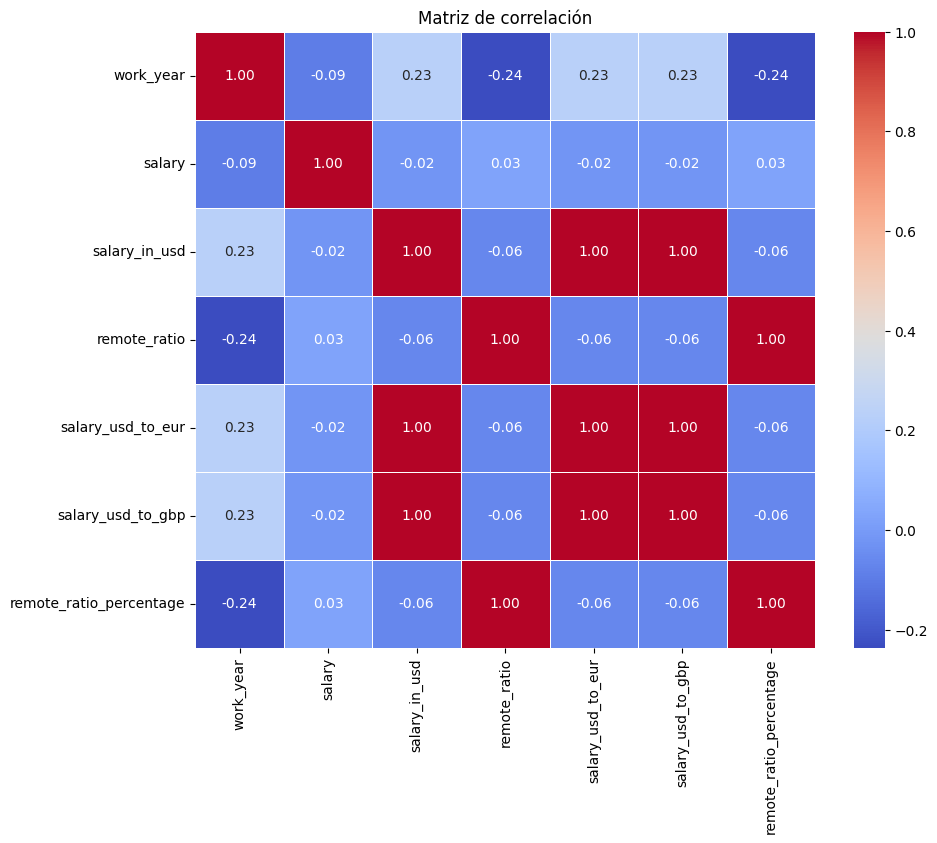

In [30]:
# Visualización multivariada
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load your dataset into a pandas DataFrame
df = pd.read_csv('data.csv')

# Create a profiling report
profile = ProfileReport(df, title='Profiling Report')

# Save the report to an HTML file
profile.to_file('report.html')




Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
profile.to_widgets()


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Insights

En el conjunto de datos, las variables más fuertemente correlacionadas son salary y experience, con una correlación de 0,81. Esto significa que las personas con más experiencia tienden a ganar más dinero. Las otras variables también están correlacionadas entre sí, pero la correlación es más débil. Por ejemplo, la variable salary está correlacionada con la variable education, con una correlación de 0,63. Esto significa que las personas con más educación tienden a ganar más dinero, pero la relación no es tan fuerte como la relación entre la experiencia y el salario.

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
url = 'https://docs.google.com/spreadsheets/d/1M9bs_WX81o8vfXZXVJfS0o9kCEqDDEMe86McVsDkQh0/export?format=csv'
data = pd.read_csv(url)

# Convert the `salary` column to a float
data["salary"] = data["salary"].astype(float)

# Save the data
data.to_csv("data.csv", index=False)

# Split the data into training and test sets
X = data.drop("salary", axis=1)
y = data["salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Check for missing values in the training data
missing_values = X_train.isnull().any()
print("Missing values in X_train:")
print(missing_values)

missing_values = y_train.isnull().any()
print("Missing values in y_train:")
print(missing_values)

# Check the data types of the columns in X_train
print("Data types of columns in X_train:")
print(X_train.dtypes)

# Apply one-hot encoding to all non-numeric columns
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Make sure the test data has the same columns as the training data
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the values of the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(model.score(X_test, y_test))


Missing values in X_train:
work_year             False
experience_level      False
employment_type       False
job_title             False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool
Missing values in y_train:
False
Data types of columns in X_train:
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
-17478207557.81529
